## Importing libraries

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [2]:
import matplotlib.pyplot as plt

## Data Cleaning

In [3]:
#load the data
df=pd.read_csv('intrusion.csv')

In [4]:
df.info

<bound method DataFrame.info of          Unnamed: 0  Destination Port  Flow Duration  Total Fwd Packets  \
0                 0                80      116049762                 16   
1                 1                53          87143                  4   
2                 2                80       85739775                  6   
3                 3                80      100765857                  6   
4                 4                80       84183749                  8   
...             ...               ...            ...                ...   
1057641     1057641                53          60644                  1   
1057642     1057642                80          16623                  3   
1057643     1057643              2401             49                  1   
1057644     1057644                80       99248317                 10   
1057645     1057645              4176              2                  1   

         Total Backward Packets  Total Length of Fwd Packets  \
0  

In [5]:
#drop unnecessary columns
new=df[["Destination Port","Flow Duration","Total Fwd Packets","Total Backward Packets" ,"Fwd Packet Length Std","Bwd Packet Length Std","Flow Bytes/s" ,"Flow Packets/s","Flow IAT Mean" ,"Fwd IAT Std" ,"Bwd IAT Std" ,"Fwd PSH Flags" ,"Bwd PSH Flags" ,"Fwd URG Flags" ,"Bwd URG Flags" ,"Fwd Packets/s" ,"Bwd Packets/s" ,"Packet Length Std" ,"FIN Flag Count" ,"SYN Flag Count" ,"RST Flag Count" ,"PSH Flag Count" ,"ACK Flag Count" ,"URG Flag Count" ,"CWE Flag Count" ,"ECE Flag Count","Down/Up Ratio" ,"Average Packet Size" ,"Avg Fwd Segment Size" ,"Avg Bwd Segment Size" ,"Fwd Avg Bulk Rate" ,"Bwd Avg Bulk Rate","Subflow Fwd Packets" ,"Subflow Fwd Bytes" ,"Subflow Bwd Packets" ,"Subflow Bwd Bytes" ,"Init_Win_bytes_forward"
             ,"Init_Win_bytes_backward" ,"act_data_pkt_fwd" ,"min_seg_size_forward" ,"Active Std","Idle Std","Label"]]

In [6]:
new.shape

(1057646, 43)

In [7]:
new.isnull().sum()

Destination Port              0
Flow Duration                 0
Total Fwd Packets             0
Total Backward Packets        0
Fwd Packet Length Std         0
Bwd Packet Length Std         0
Flow Bytes/s               1059
Flow Packets/s                0
Flow IAT Mean                 0
Fwd IAT Std                   0
Bwd IAT Std                   0
Fwd PSH Flags                 0
Bwd PSH Flags                 0
Fwd URG Flags                 0
Bwd URG Flags                 0
Fwd Packets/s                 0
Bwd Packets/s                 0
Packet Length Std             0
FIN Flag Count                0
SYN Flag Count                0
RST Flag Count                0
PSH Flag Count                0
ACK Flag Count                0
URG Flag Count                0
CWE Flag Count                0
ECE Flag Count                0
Down/Up Ratio                 0
Average Packet Size           0
Avg Fwd Segment Size          0
Avg Bwd Segment Size          0
Fwd Avg Bulk Rate             0
Bwd Avg 

In [8]:
new.dropna(inplace=True)

<ipython-input-8-00a98c03372c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new.dropna(inplace=True)


In [9]:
new.shape

(1056587, 43)

In [10]:
new.drop_duplicates(inplace=True)

<ipython-input-10-896cc93336df>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new.drop_duplicates(inplace=True)


In [11]:
new.shape

(871226, 43)

In [12]:
new.drop(columns=['Flow Bytes/s', 'Flow Packets/s'], inplace=True)

/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [13]:
new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 871226 entries, 0 to 1057645
Data columns (total 41 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Destination Port         871226 non-null  int64  
 1   Flow Duration            871226 non-null  int64  
 2   Total Fwd Packets        871226 non-null  int64  
 3   Total Backward Packets   871226 non-null  int64  
 4   Fwd Packet Length Std    871226 non-null  float64
 5   Bwd Packet Length Std    871226 non-null  float64
 6   Flow IAT Mean            871226 non-null  float64
 7   Fwd IAT Std              871226 non-null  float64
 8   Bwd IAT Std              871226 non-null  float64
 9   Fwd PSH Flags            871226 non-null  int64  
 10  Bwd PSH Flags            871226 non-null  int64  
 11  Fwd URG Flags            871226 non-null  int64  
 12  Bwd URG Flags            871226 non-null  int64  
 13  Fwd Packets/s            871226 non-null  float64
 14  Bwd

In [14]:
new.head(5)

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Fwd Packet Length Std,Bwd Packet Length Std,Flow IAT Mean,Fwd IAT Std,Bwd IAT Std,Fwd PSH Flags,...,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Std,Idle Std,Label
0,80,116049762,16,14,111.500000,261.648756,4001715.931,4.157941e+06,3.766086e+06,0,...,446,14,979,29200,118,1,32,10434.5796,6.051734e+03,BENIGN
1,53,87143,4,2,0.000000,0.000000,17428.600,1.780433e+04,0.000000e+00,0,...,140,2,358,-1,-1,3,20,0.0000,0.000000e+00,BENIGN
2,80,85739775,6,5,154.726102,3331.638186,8573977.500,3.830000e+07,6.106404e+04,0,...,379,5,11595,274,235,1,32,0.0000,0.000000e+00,DoS Hulk
3,80,100765857,6,8,159.589473,1729.380148,7751219.769,4.490000e+07,3.790000e+07,0,...,636,8,11595,0,235,3,20,0.0000,0.000000e+00,DoS Hulk
4,80,84183749,8,4,5.656854,3540.002860,7653068.091,2.860000e+07,2.009570e+04,0,...,56,4,11601,256,229,6,20,0.0000,4.890000e+07,DDoS


In [44]:
new.to_csv('attack.csv')

In [15]:
# Separate features and target
X = new.iloc[:, :-1]
y = new.iloc[:, -1]

# Convert labels to numerical values
le = LabelEncoder()
y = le.fit_transform(y)

In [16]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [17]:
# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Deep Neural Network

In [18]:
# Build the model
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(len(np.unique(y)), activation='softmax')
])

In [19]:
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                2624      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 15)                495       
                                                                 
Total params: 5,199
Trainable params: 5,199
Non-trainable params: 0
_________________________________________________________________


In [20]:
# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
17425/17425 [==============================] - 29s 2ms/step - loss: 0.2897 - accuracy: 0.9151 - val_loss: 0.1291 - val_accuracy: 0.9571
Epoch 2/10
17425/17425 [==============================] - 28s 2ms/step - loss: 0.1877 - accuracy: 0.9415 - val_loss: 0.1112 - val_accuracy: 0.9697
Epoch 3/10
17425/17425 [==============================] - 28s 2ms/step - loss: 0.1738 - accuracy: 0.9470 - val_loss: 0.1010 - val_accuracy: 0.9680
Epoch 4/10
17425/17425 [==============================] - 29s 2ms/step - loss: 0.1671 - accuracy: 0.9486 - val_loss: 0.1032 - val_accuracy: 0.9673
Epoch 5/10
17425/17425 [==============================] - 29s 2ms/step - loss: 0.1690 - accuracy: 0.9500 - val_loss: 0.1023 - val_accuracy: 0.9688
Epoch 6/10
17425/17425 [==============================] - 29s 2ms/step - loss: 0.1633 - accuracy: 0.9506 - val_loss: 0.0994 - val_accuracy: 0.9713
Epoch 7/10
17425/17425 [==============================] - 28s 2ms/step - loss: 0.1635 - accuracy: 0.9518 - val_loss: 0

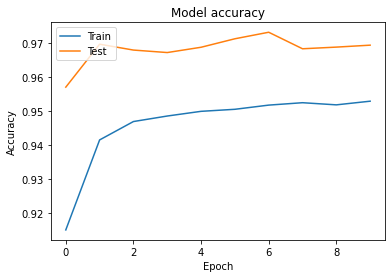

In [22]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


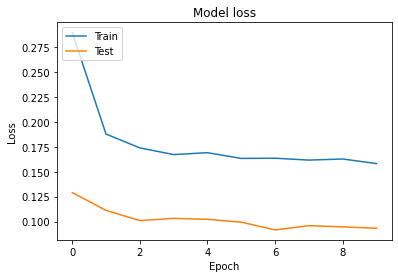

In [23]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [24]:
# Evaluate the model on the testing set
test_loss, test_acc = model.evaluate(X_test, y_test)

print('Test accuracy:', test_acc)

5446/5446 [==============================] - 6s 1ms/step - loss: 0.0940 - accuracy: 0.9695
Test accuracy: 0.9695143699645996


## Using Autoencoder to reduce dimensionality of the data

In [31]:
from keras.utils import to_categorical
from keras.models import Model
from keras.layers import Input, Dense

In [27]:
# Split the data into X and y
X = new.iloc[:, :-1]
y = new.iloc[:, -1]

# Convert y to one-hot encoding
encoder = LabelEncoder()
encoder.fit(y)
y_encoded = encoder.transform(y)
y_onehot = to_categorical(y_encoded)

In [28]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_onehot, test_size=0.2)


In [29]:
# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [32]:
# Define the autoencoder model
input_dim = X_train.shape[1]
encoding_dim = 20

input_layer = Input(shape=(input_dim, ))
encoder_layer = Dense(encoding_dim, activation='relu')(input_layer)
decoder_layer = Dense(input_dim, activation='sigmoid')(encoder_layer)

autoencoder = Model(inputs=input_layer, outputs=decoder_layer)

autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [33]:
# Train the autoencoder
autoencoder.fit(X_train, X_train, epochs=50, batch_size=32, shuffle=True, validation_data=(X_test, X_test))

Epoch 1/50
21781/21781 [==============================] - 31s 1ms/step - loss: -2314.1216 - val_loss: -6539.2388
Epoch 2/50
21781/21781 [==============================] - 31s 1ms/step - loss: -14303.7275 - val_loss: -23874.0547
Epoch 3/50
21781/21781 [==============================] - 31s 1ms/step - loss: -36851.6367 - val_loss: -51691.6250
Epoch 4/50
21781/21781 [==============================] - 31s 1ms/step - loss: -69827.3594 - val_loss: -89911.1172
Epoch 5/50
21781/21781 [==============================] - 31s 1ms/step - loss: -113167.0312 - val_loss: -138537.4688
Epoch 6/50
21781/21781 [==============================] - 31s 1ms/step - loss: -166863.0000 - val_loss: -197504.7031
Epoch 7/50
21781/21781 [==============================] - 31s 1ms/step - loss: -230884.6406 - val_loss: -266824.2812
Epoch 8/50
21781/21781 [==============================] - 31s 1ms/step - loss: -305238.7188 - val_loss: -346526.3125
Epoch 9/50
21781/21781 [==============================] - 31s 1ms/step - l

In [34]:
# Use the trained encoder to reduce the dimensionality of X_train and X_test
encoder = Model(inputs=input_layer, outputs=encoder_layer)
X_train_encoded = encoder.predict(X_train)
X_test_encoded = encoder.predict(X_test)

5446/5446 [==============================] - 5s 835us/step


In [35]:

# Define the deep neural network model
input_dim = X_train_encoded.shape[1]
output_dim = y_train.shape[1]


In [38]:
from keras.models import Sequential
model = Sequential()
model.add(Dense(64, input_dim=input_dim, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(output_dim, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [39]:
# Train the deep neural network model
model.fit(X_train_encoded, y_train, epochs=20, batch_size=32, shuffle=True, validation_data=(X_test_encoded, y_test))

Epoch 1/20
21781/21781 [==============================] - 34s 2ms/step - loss: 0.9651 - accuracy: 0.8714 - val_loss: 0.0647 - val_accuracy: 0.8051
Epoch 2/20
21781/21781 [==============================] - 33s 2ms/step - loss: 0.0426 - accuracy: 0.8988 - val_loss: 0.0381 - val_accuracy: 0.9070
Epoch 3/20
21781/21781 [==============================] - 34s 2ms/step - loss: 0.0443 - accuracy: 0.8813 - val_loss: 0.0459 - val_accuracy: 0.8695
Epoch 4/20
21781/21781 [==============================] - 34s 2ms/step - loss: 0.0481 - accuracy: 0.8610 - val_loss: 0.0456 - val_accuracy: 0.8636
Epoch 5/20
21781/21781 [==============================] - 34s 2ms/step - loss: 0.0471 - accuracy: 0.8678 - val_loss: 0.0461 - val_accuracy: 0.8540
Epoch 6/20
21781/21781 [==============================] - 34s 2ms/step - loss: 0.0448 - accuracy: 0.8740 - val_loss: 0.0435 - val_accuracy: 0.8781
Epoch 7/20
21781/21781 [==============================] - 33s 2ms/step - loss: 0.0442 - accuracy: 0.8757 - val_loss: 0

In [41]:
# Evaluate the model on the testing set
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

InvalidArgumentError: Graph execution error:

Detected at node 'sequential_1/dense_5/Relu' defined at (most recent call last):
    File "/shared/centos7/anaconda3/2021.05/lib/python3.8/runpy.py", line 194, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "/shared/centos7/anaconda3/2021.05/lib/python3.8/runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/traitlets/config/application.py", line 845, in launch_instance
      app.start()
    File "/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/ipykernel/kernelapp.py", line 612, in start
      self.io_loop.start()
    File "/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/tornado/platform/asyncio.py", line 199, in start
      self.asyncio_loop.run_forever()
    File "/shared/centos7/anaconda3/2021.05/lib/python3.8/asyncio/base_events.py", line 570, in run_forever
      self._run_once()
    File "/shared/centos7/anaconda3/2021.05/lib/python3.8/asyncio/base_events.py", line 1859, in _run_once
      handle._run()
    File "/shared/centos7/anaconda3/2021.05/lib/python3.8/asyncio/events.py", line 81, in _run
      self._context.run(self._callback, *self._args)
    File "/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/tornado/ioloop.py", line 688, in <lambda>
      lambda f: self._run_callback(functools.partial(callback, future))
    File "/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/tornado/ioloop.py", line 741, in _run_callback
      ret = callback()
    File "/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/tornado/gen.py", line 814, in inner
      self.ctx_run(self.run)
    File "/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/tornado/gen.py", line 775, in run
      yielded = self.gen.send(value)
    File "/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/ipykernel/kernelbase.py", line 365, in process_one
      yield gen.maybe_future(dispatch(*args))
    File "/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/tornado/gen.py", line 234, in wrapper
      yielded = ctx_run(next, result)
    File "/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/ipykernel/kernelbase.py", line 268, in dispatch_shell
      yield gen.maybe_future(handler(stream, idents, msg))
    File "/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/tornado/gen.py", line 234, in wrapper
      yielded = ctx_run(next, result)
    File "/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/ipykernel/kernelbase.py", line 543, in execute_request
      self.do_execute(
    File "/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/tornado/gen.py", line 234, in wrapper
      yielded = ctx_run(next, result)
    File "/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/ipykernel/ipkernel.py", line 306, in do_execute
      res = shell.run_cell(code, store_history=store_history, silent=silent)
    File "/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/ipykernel/zmqshell.py", line 536, in run_cell
      return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
    File "/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 2894, in run_cell
      result = self._run_cell(
    File "/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 2940, in _run_cell
      return runner(coro)
    File "/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/IPython/core/async_helpers.py", line 68, in _pseudo_sync_runner
      coro.send(None)
    File "/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3165, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3357, in run_ast_nodes
      if (await self.run_code(code, result,  async_=asy)):
    File "/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3437, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "<ipython-input-40-aca2084f00f6>", line 2, in <module>
      test_loss, test_acc = model.evaluate(X_test, y_test)
    File "/home/gupta.aay/.local/lib/python3.8/site-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/home/gupta.aay/.local/lib/python3.8/site-packages/keras/engine/training.py", line 2040, in evaluate
      tmp_logs = self.test_function(iterator)
    File "/home/gupta.aay/.local/lib/python3.8/site-packages/keras/engine/training.py", line 1820, in test_function
      return step_function(self, iterator)
    File "/home/gupta.aay/.local/lib/python3.8/site-packages/keras/engine/training.py", line 1804, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/gupta.aay/.local/lib/python3.8/site-packages/keras/engine/training.py", line 1792, in run_step
      outputs = model.test_step(data)
    File "/home/gupta.aay/.local/lib/python3.8/site-packages/keras/engine/training.py", line 1756, in test_step
      y_pred = self(x, training=False)
    File "/home/gupta.aay/.local/lib/python3.8/site-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/home/gupta.aay/.local/lib/python3.8/site-packages/keras/engine/training.py", line 561, in __call__
      return super().__call__(*args, **kwargs)
    File "/home/gupta.aay/.local/lib/python3.8/site-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/home/gupta.aay/.local/lib/python3.8/site-packages/keras/engine/base_layer.py", line 1132, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "/home/gupta.aay/.local/lib/python3.8/site-packages/keras/utils/traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "/home/gupta.aay/.local/lib/python3.8/site-packages/keras/engine/sequential.py", line 413, in call
      return super().call(inputs, training=training, mask=mask)
    File "/home/gupta.aay/.local/lib/python3.8/site-packages/keras/engine/functional.py", line 511, in call
      return self._run_internal_graph(inputs, training=training, mask=mask)
    File "/home/gupta.aay/.local/lib/python3.8/site-packages/keras/engine/functional.py", line 668, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "/home/gupta.aay/.local/lib/python3.8/site-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/home/gupta.aay/.local/lib/python3.8/site-packages/keras/engine/base_layer.py", line 1132, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "/home/gupta.aay/.local/lib/python3.8/site-packages/keras/utils/traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "/home/gupta.aay/.local/lib/python3.8/site-packages/keras/layers/core/dense.py", line 255, in call
      outputs = self.activation(outputs)
    File "/home/gupta.aay/.local/lib/python3.8/site-packages/keras/activations.py", line 317, in relu
      return backend.relu(
    File "/home/gupta.aay/.local/lib/python3.8/site-packages/keras/backend.py", line 5369, in relu
      x = tf.nn.relu(x)
Node: 'sequential_1/dense_5/Relu'
Matrix size-incompatible: In[0]: [32,40], In[1]: [20,64]
	 [[{{node sequential_1/dense_5/Relu}}]] [Op:__inference_test_function_7378720]

## GAN

In [14]:
'''
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Input, BatchNormalization, Activation
from keras.layers import LeakyReLU
from keras.optimizers import Adam
import numpy as np
import pandas as pd

# Load and preprocess data
# data = pd.read_csv('CICIDS2017.csv')
X = data.drop('Label', axis=1)
y = data['Label']
X = X.values.astype('float32') / 255

# Define generator
generator = Sequential()
generator.add(Dense(256, input_dim=100))
generator.add(LeakyReLU(alpha=0.2))
generator.add(BatchNormalization(momentum=0.8))
generator.add(Dense(512))
generator.add(LeakyReLU(alpha=0.2))
generator.add(BatchNormalization(momentum=0.8))
generator.add(Dense(1024))
generator.add(LeakyReLU(alpha=0.2))
generator.add(BatchNormalization(momentum=0.8))
generator.add(Dense(np.prod(X.shape[1:]), activation='tanh'))
generator.add(Reshape(X.shape[1:]))

# Define discriminator
discriminator = Sequential()
discriminator.add(Flatten(input_shape=X.shape[1:]))
discriminator.add(Dense(512))
discriminator.add(LeakyReLU(alpha=0.2))
discriminator.add(Dense(256))
discriminator.add(LeakyReLU(alpha=0.2))
discriminator.add(Dense(1, activation='sigmoid'))

# Compile discriminator
discriminator.compile(loss='binary_crossentropy', optimizer=Adam(0.0002, 0.5), metrics=['accuracy'])

# Define combined model
z = Input(shape=(100,))
img = generator(z)
discriminator.trainable = False
valid = discriminator(img)
combined = Model(z, valid)
combined.compile(loss='binary_crossentropy', optimizer=Adam(0.0002, 0.5))

# Train GAN
epochs = 20000
batch_size = 32
half_batch = int(batch_size / 2)

for epoch in range(epochs):
    # Train discriminator
    idx = np.random.randint(0, X.shape[0], half_batch)
    imgs = X[idx]
    noise = np.random.normal(0, 1, (half_batch, 100))
    gen_imgs = generator.predict(noise)
    d_loss_real = discriminator.train_on_batch(imgs, np.ones((half_batch, 1)))
    d_loss_fake = discriminator.train_on_batch(gen_imgs, np.zeros((half_batch, 1)))
    d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

    # Train generator
    noise = np.random.normal(0, 1, (batch_size, 100))
    valid_y = np.array([1] * batch_size)
    g_loss = combined.train_on_batch(noise, valid_y)

    # Print progress
    if epoch % 100 == 0:
        print("%d [D loss: %f, acc.: %.2f%%] [G loss: %f]" % (epoch, d_loss[0], 100 * d_loss[1], g_loss))
'''

'\nfrom keras.models import Sequential, Model\nfrom keras.layers import Dense, Dropout, Input, BatchNormalization, Activation\nfrom keras.layers import LeakyReLU\nfrom keras.optimizers import Adam\nimport numpy as np\nimport pandas as pd\n\n# Load and preprocess data\n# data = pd.read_csv(\'CICIDS2017.csv\')\nX = data.drop(\'Label\', axis=1)\ny = data[\'Label\']\nX = X.values.astype(\'float32\') / 255\n\n# Define generator\ngenerator = Sequential()\ngenerator.add(Dense(256, input_dim=100))\ngenerator.add(LeakyReLU(alpha=0.2))\ngenerator.add(BatchNormalization(momentum=0.8))\ngenerator.add(Dense(512))\ngenerator.add(LeakyReLU(alpha=0.2))\ngenerator.add(BatchNormalization(momentum=0.8))\ngenerator.add(Dense(1024))\ngenerator.add(LeakyReLU(alpha=0.2))\ngenerator.add(BatchNormalization(momentum=0.8))\ngenerator.add(Dense(np.prod(X.shape[1:]), activation=\'tanh\'))\ngenerator.add(Reshape(X.shape[1:]))\n\n# Define discriminator\ndiscriminator = Sequential()\ndiscriminator.add(Flatten(input_s